In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import re

SENTENCE_STOPPERS = ["?","!","."]

with open("authorship_scarlet_letter.txt") as s_l:
    read_sl = s_l.readlines()

with open("authorship_great_expectations.txt") as g_e:
    read_ge = g_e.readlines()

with open("authorship_unknown_1.txt") as uk_1:
    read_uk1 = uk_1.readlines()

with open("authorship_unknown_2.txt") as uk_2:
    read_uk2 = uk_2.readlines()

In [2]:
# Functions



def paragraph(book,paragraphs, current_lines):
    for line in book:
        if line == '\n':
            current_paragraph = " ".join(current_lines)
            paragraphs.append(current_paragraph)
            current_lines = []
        else:
            current_lines.append(line[:-1])
    current_lines = []
    return paragraphs


def chapter(paragraphs,current_paragraphs, chapters):
    for line in paragraphs:
        lines = line.split()
        if lines == []:
            continue
        elif lines[0] == 'Chapter':
            if current_paragraphs != []:
                chapters.append(current_paragraphs)
            current_paragraphs = []
            current_paragraphs.append(line[33:])
        else:
            current_paragraphs.append(line)
    return chapters

def sentence(book, sentences):
    current_sentence = []
    sentences = []
    for sublist in book:
        for line in sublist:
            # print(line)
            if line[0:7] == 'Chapter':
                continue
            elif line[1:8] == 'Chapter':
                line = line[1:]
                continue
            else:
                lines = line.split()
                # print(lines)
                for word in lines:
                    # print(word)
                    if word[-1] in SENTENCE_STOPPERS:
                        # print(word)
                        current_sentence.append(word[:-1])
                        current_sentence = " ".join(current_sentence)
                        sentences.append(current_sentence)
                        current_sentence = []
                        continue
                    elif '."' in word:
                        # print(word)
                        current_sentence.append(word[:-2])
                        current_sentence = " ".join(current_sentence)
                        sentences.append(current_sentence)
                        current_sentence = []
                        continue
                    elif '?"' in word:
                        # print(word)
                        current_sentence.append(word[:-2])
                        current_sentence = " ".join(current_sentence)
                        sentences.append(current_sentence)
                        current_sentence = []
                        continue
                    elif '!"' in word:
                        # print(word)
                        current_sentence.append(word[:-2])
                        current_sentence = " ".join(current_sentence)
                        sentences.append(current_sentence)
                        current_sentence = []
                        continue
                    # elif word[0].isupper():
                        # print(word)
                        continue
                    else:
                        current_sentence.append(word)
    return sentences

def sen_par(paragraphs, sentence_paragraph_count):
    
    current_sentence = []
    sentences = []
    paragraph = []
    for sublist in paragraphs:
        # print(sublist)
        for word in sublist:
            if word[-1] in SENTENCE_STOPPERS:
                # print(word)
                current_sentence.append(word[:-1])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '."' in word:
                # print(word)
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '?"' in word:
                # print(word)
                current_sentence.append(word[:-2])
                
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '!"' in word:
                # print(word)
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            # elif word[0].isupper():
                # print(word)
                continue
            else:
                current_sentence.append(word)
        paragraph.append(sentences)
        sentences = []
    
    for line in paragraph:
        for text in line:
            current_line = text.split()
        if 'Chapter' in current_line:
            continue
        else: 
            if len(line) == 0:
                continue
            else:
                sentence_paragraph_count.append(len(line))
    return sentence_paragraph_count

def word_par(paragraphs, word_paragraph_count):


    current_sentence = []
    sentences = []
    paragraph = []
    for sublist in paragraphs:
        for word in sublist:
            if word[-1] in SENTENCE_STOPPERS:
                current_sentence.append(word[:-1])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '."' in word:
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '?"' in word:
                current_sentence.append(word[:-2])
                
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '!"' in word:
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            else:
                current_sentence.append(word)
        paragraph.append(sentences)
        sentences = []
        
    word_paragraph = []

    for line in paragraph:
        for text in line:
            current_line = text.split()
            if 'Chapter' in current_line:
                continue
            else: 
                good_line = current_line
                if len(good_line) == 0:
                    continue
                else:
                    sentences.append(good_line)
        word_paragraph.append(sentences)
        sentences = []
    lines = []
    for line in word_paragraph:
        for text in line:
            lines.append(len(text))
        if len(lines) == 0:
            continue
        else:
            f = sum((lines))
            word_paragraph_count.append(f)
        lines = []
    return word_paragraph_count

def word_sen(sentences, sentence_length):
    for line in sentences:
        line = line.split()
        sentence_length.append(len(line))
    return sentence_length

        
def comma_par(paragraphs, comma_line):
    current_sentence = []
    sentences = []
    paragraph = []
    comma_count = []
    comma_line = []
    for sublist in paragraphs:
        for word in sublist:
            if word[-1] in SENTENCE_STOPPERS:
                current_sentence.append(word[:-1])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '."' in word:
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '?"' in word:
                current_sentence.append(word[:-2])
                
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            elif '!"' in word:
                current_sentence.append(word[:-2])
                current_sentence = "".join(current_sentence)
                sentences.append(current_sentence)
                current_sentence = []
                continue
            else:
                current_sentence.append(word)
        paragraph.append(sentences)
        sentences = []

    for line in paragraph:
        # print(line)
        full_line = "".join(line)
        current_line = full_line.split()
        # print(current_line)
        if 'Chapter' in current_line:
            continue
        else: 
            good_line = current_line
            # print(good_line)
            if len(good_line) == 0:
                # print(good_line)
                continue
            else:
                # print(good_line)
                for item in line:
                            target = ','
                            # print(target)
                            count = 0
                            count += item.count(target)
                            comma_count.append(count)
                            count = 0
        comma_line.append(sum(comma_count))  
        comma_count = []  
    return comma_line


def quote_chapter(chapters, quote_chapter):
    count = 0
    for sublist in chapters:
        # print(sublist)
        chapter = ' '.join(sublist)
        # print(chapter)
        chapter = chapter.split()
        # print(chapter)
        for text in chapter:
            text.split()
            # print(text)
            if '"' in text:
                if text[-1] == '"':
                    count += 0.5
                if text[0] == '"':
                    count += 0.5
        quote_chapter.append(count)
        count = 0
    return quote_chapter


def mean (some_list):
    list_sum = 0
    for num in some_list:
        list_sum += num
    avg = list_sum/len(some_list)
    return avg

def median (some_list):
    list_sort = sorted(some_list) 
    mid_i = len(list_sort) // 2
    right_mid = len(list_sort) // 2 - 1
    if len(list_sort) % 2 == 1:
        med = list_sort[mid_i]
    else:
        med = (list_sort[mid_i] + list_sort[right_mid]) / 2
 
    return med
    
def variance (some_list):
    current_mean = mean(some_list)
    current_sum = 0
    for number in some_list:
        current_sum += (number - current_mean)**2

    var = current_sum/len(some_list)

    return var

def stdev (some_list):
    dev = (variance(some_list))**(1/2)
    return dev


def gauss(x, mean, stdev):
    gaussian = (1/(stdev*math.sqrt(2*math.pi)))*math.e**(-1/2*((x - mean)/(stdev))**2)


    # gaussian = (1/(stdev*math.sqrt(2*math.pi)))*math.e**(( x - mean)**2)/(2*stdev**2)

    return gaussian

def k_factor(mu1, mu2, var1, var2):
    numerator = abs(mu2 - mu1)
    denominator = ((0.5 * (var2**2 + var1**2))**0.5)
    return numerator / denominator


def bayesian_formula(known_mean, known_std, unknown_mean, feature):
    feature = (math.e**((-1/2)*(((unknown_mean - known_mean)/known_std)**2)))/(((2*math.pi)**(1/2))*known_std)
    return feature

def bayes(sl_feature_senpar, ge_feature_senpar, sl_feature_compar, ge_feature_compar, sl_feature_quotechap, ge_feature_quotechap):
    feature_probs = [(sl_feature_senpar , ge_feature_senpar) , (sl_feature_compar , ge_feature_compar) , (sl_feature_quotechap , ge_feature_quotechap)]
#     # this example assumes that we have two classes, and three features for each class

#     feature_probs = [(.25 , .45) , (.62 , .78) , (.55 , .16)] # 3 feature probabilities for each of the two classes
#     prior[0] = .55 # initial prior probability for class 1
#     prior[1] = .45 # initial prior probability for class 2

#     # update the posterior probabilities using Bayes’ Theorem for each applicable feature
#     #
#     nfeats = 3
#     for nf in range(nfeats) :
#         if feature[nf] in nf:
#             posterior[0] = prior[0] * feature_probs[nf][0] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
#             posterior[1] = prior[1] * feature_probs[nf][1] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
#             prior[0] = posterior[0]
#             prior[1] = posterior[1]


# prior = 

# nfeats = 3
# for nf in range(nfeats):


In [3]:
# SCARLET LETTER

letter_paragraphs = []
current_lines = []
letter_chapters = []
scarlet_letter_paragraphs = paragraph(read_sl,letter_paragraphs,current_lines)
current_paragraphs = []
letter_chapters = chapter(scarlet_letter_paragraphs, current_paragraphs, letter_chapters)
print(letter_chapters)

uk1_paragraphs = []
current_lines = []
uk1_chapters = []
unknown1_paragraphs = paragraph(read_uk1,uk1_paragraphs,current_lines)
current_paragraphs = []
uk1_chapters = chapter(unknown1_paragraphs, current_paragraphs, uk1_chapters)


letter_sentences = []
letter_sentences = sentence(letter_chapters, letter_sentences)
# print(letter_sentences)




# sentences/paragraph
scarlet_letter_paragraph_count = []
sl_sen_par = sen_par(scarlet_letter_paragraphs, scarlet_letter_paragraph_count)
# print(sl_sen_par)

# words/paragraph
sl_word_paragraph_count = []
sl_word_paragraph_count = word_par(scarlet_letter_paragraphs, sl_word_paragraph_count)
# print(sl_word_paragraph_count)

# words/sentence 
sl_sentence_length = []
sl_sentence_length = word_sen(letter_sentences, sl_sentence_length)
# print(sl_sentence_length)

# commas/paragraph 
sl_comma_count = []
sl_comma_count = comma_par(letter_paragraphs, sl_comma_count)
# print(sl_comma_count)

# quotes/chapter
sl_quote_chap = []
sl_quote_chap = quote_chapter(letter_chapters, sl_quote_chap)


sl_senpar_mean = mean(sl_sen_par)
sl_wordpar_mean = mean(sl_word_paragraph_count)
sl_wordsen_mean = mean(sl_sentence_length)
sl_compar_mean = mean(sl_comma_count)
sl_quotechap_mean = mean(sl_quote_chap)

sl_senpar_stdev = stdev(sl_sen_par)
sl_wordpar_stdev = stdev(sl_word_paragraph_count)
sl_wordsen_stdev = stdev(sl_sentence_length)
sl_compar_stdev = stdev(sl_comma_count)
sl_quotechap_stdev = stdev(sl_quote_chap)



# print(sl_senpar_mean)
# print(sl_senpar_stdev)
# print(sl_wordpar_mean)
# print(sl_wordpar_stdev)
# print(sl_wordsen_mean)
# print(sl_wordsen_stdev)


# # VERY WRONG
# print(sl_compar_mean)
# print(sl_compar_stdev)

# print(sl_quote_chap)
# print(sl_quotechap_mean)
# print(sl_quotechap_stdev)

[[' Chapter I THE PRISON DOOR.', 'A throng of bearded men, in sad-colored garments, and gray, steeple-crowned hats, intermixed with women, some wearing hoods and others bareheaded, was assembled in front of a wooden edifice, the door of which was heavily timbered with oak, and studded with iron spikes.', "The founders of a new colony, whatever Utopia of human virtue and happiness they might originally project, have invariably recognized it among their earliest practical necessities to allot a portion of the virgin soil as a cemetery, and another portion as the site of a prison. In accordance with this rule, it may safely be assumed that the forefathers of Boston had built the first prison-house somewhere in the vicinity of Cornhill, almost as seasonably as they marked out the first burial-ground, on Isaac Johnson's lot, and round about his grave, which subsequently became the nucleus of all the congregated sepulchres in the old churchyard of King's Chapel. Certain it is, that, some fif

In [4]:
# Great Expectations 
ge_paragraphs = []
current_lines = []
great_expectations_paragraphs = paragraph(read_ge,ge_paragraphs,current_lines)
current_paragraphs = []
ge_chapters = []
ge_chapters = chapter(great_expectations_paragraphs, current_paragraphs, ge_chapters)
ge_sentences = []
ge_sentences = sentence(ge_chapters, ge_sentences)


# sentences/paragraph
ge_paragraph_count = []
ge_sen_par = sen_par(great_expectations_paragraphs, ge_paragraph_count)
# print(sl_sen_par)

# words/paragraph
ge_word_paragraph_count = []
ge_word_paragraph_count = word_par(great_expectations_paragraphs, ge_word_paragraph_count)
# print(sl_word_paragraph_count)

# words/sentence 
ge_sentence_length = []
ge_sentence_length = word_sen(ge_sentences, ge_sentence_length)
# print(sl_sentence_length)

# commas/paragraph 
ge_comma_count = []
ge_comma_count = comma_par(great_expectations_paragraphs, ge_comma_count)
# print(sl_comma_count)

# quotes/chapter
ge_quote_chap = []
count = 0
for sublist in ge_chapters:
    # print(sublist)
    chapter = ' '.join(sublist)
    # print(chapter)
    chapter = chapter.split()
    # print(chapter)
    for text in chapter:
        text.split()
        # print(text)
        if '“' in text:
            # print(text)
            if text[0] == '“':
                count += 0.5
        if '”' in text: 
            # print(text)
            if text[-1] == '”':
                count += 0.5
    ge_quote_chap.append(count)
    count = 0
# print(ge_quote_chap)


ge_senpar_mean = mean(ge_sen_par)
ge_wordpar_mean = mean(ge_word_paragraph_count)
ge_wordsen_mean = mean(ge_sentence_length)
ge_compar_mean = mean(ge_comma_count)
ge_quotechap_mean = mean(ge_quote_chap)

ge_senpar_stdev = stdev(ge_sen_par)
ge_wordpar_stdev = stdev(ge_word_paragraph_count)
ge_wordsen_stdev = stdev(ge_sentence_length)
ge_compar_stdev = stdev(ge_comma_count)
ge_quotechap_stdev = stdev(ge_quote_chap)



# print(ge_senpar_mean)
# print(ge_senpar_stdev)
# print(ge_wordpar_mean)
# print(ge_wordpar_stdev)
# print(ge_wordsen_mean)
# print(ge_wordsen_stdev)

# # VERY WRONG
# print(ge_compar_mean)
# print(ge_compar_stdev)
# print(ge_quote_chap)
# print(ge_quotechap_mean)
# print(ge_quotechap_stdev)




In [5]:
# UNKNOWN NOVEL ONE

# print(letter_chapters)
uk1_sentences = []
uk1_sentences = sentence(uk1_chapters,uk1_sentences)
# print(letter_sentences)




# sentences/paragraph
uk1_paragraph_count = []
uk1_sen_par = sen_par(unknown1_paragraphs, uk1_paragraph_count)
# print(sl_sen_par)

# words/paragraph
# uk1_word_paragraph_count = []
# uk1_word_paragraph_count = word_par(unknown1_paragraphs, uk1_word_paragraph_count)
# print(sl_word_paragraph_count)

# words/sentence 
# uk1_sentence_length = []
# uk1_sentence_length = word_sen(uk1_sentences, uk1_sentence_length)
# # print(sl_sentence_length)

# commas/paragraph 
uk1_comma_count = []
uk1_comma_count = comma_par(uk1_paragraphs, uk1_comma_count)
# print(sl_comma_count)

# quotes/chapter
uk1_quote_chap = []
uk1_quote_chap = quote_chapter(uk1_chapters, uk1_quote_chap)


uk1_senpar_mean = mean(uk1_sen_par)
# uk1_wordpar_mean = mean(uk1_word_paragraph_count)
# uk1_wordsen_mean = mean(uk1_sentence_length)
uk1_compar_mean = mean(uk1_comma_count)
uk1_quotechap_mean = mean(uk1_quote_chap)

uk1_senpar_stdev = stdev(uk1_sen_par)
# uk1_wordpar_stdev = stdev(uk1_word_paragraph_count)
# uk1_wordsen_stdev = stdev(uk1_sentence_length)
uk1_compar_stdev = stdev(uk1_comma_count)
uk1_quotechap_stdev = stdev(uk1_quote_chap)



print(uk1_senpar_mean)
print(uk1_senpar_stdev)
print(uk1_compar_mean)
print(uk1_compar_stdev)
print(uk1_quotechap_mean)
print(uk1_quotechap_stdev)

5.053879310344827
3.4059573244212515
11.742456896551724
11.528892079655732
43.05
27.49086211816574


In [6]:
 #  3 feature probabilities that we will test: in the order (Hawthorne, Dickens)
# Features are Sentence/Paragraph, Comma/Paragraph, and Quotations/Chapter

# prior[0] = 0.5
# prior[1] = 0.5

# pfeature = [(sl_senpar_mean, ge_senpar_mean), (sl_compar_mean, ge_compar_mean), (sl_quotechap_mean, ge_quotechap_mean)]

# Pposterior(B1) = Pfeat(B1) * Pprior(B1) /(Pfeat(B1) Pprior(B1) + Pfeat(B2) Pprior(B2))=
# (.4 * .5) /(.4 * .5 + .6 * .5) = 40% = Pprior(B1)

In [7]:
# UNKNOWN NOVEL TWO


uk2_paragraphs = []
current_lines = []
uk2_chapters = []
unknown2_paragraphs = paragraph(read_uk2,uk2_paragraphs,current_lines)
current_paragraphs = []

for line in unknown2_paragraphs:
    # print(line)
    lines = line.split()
    # print(lines)
    if lines == []:
        continue
    elif 'CHAPTER' in lines:
        # print(lines)
        if current_paragraphs != []:
            uk2_chapters.append(current_paragraphs)
        current_paragraphs = []
        current_paragraphs.append(line)
        # print(current_paragraphs)
    else:
        current_paragraphs.append(line)

# print(uk2_chapters)


# print(letter_chapters)
uk2_sentences = []
uk2_sentences = sentence(uk2_chapters,uk2_sentences)
# print(letter_sentences)




# sentences/paragraph
uk2_paragraph_count = []
uk2_sen_par = sen_par(unknown2_paragraphs, uk2_paragraph_count)
# print(sl_sen_par)

# words/paragraph
# uk2_word_paragraph_count = []
# uk2_word_paragraph_count = word_par(unknown2_paragraphs, uk2_word_paragraph_count)
# print(sl_word_paragraph_count)

# words/sentence 
# uk1_sentence_length = []
# uk1_sentence_length = word_sen(uk1_sentences, uk1_sentence_length)
# # print(sl_sentence_length)

# commas/paragraph 
uk2_comma_count = []
uk2_comma_count = comma_par(uk2_paragraphs, uk2_comma_count)
# print(sl_comma_count)

# quotes/chapter
uk2_quote_chap = []
uk2_quote_chap = quote_chapter(uk2_chapters, uk2_quote_chap)
# print(uk2_chapters)
# print(uk2_quote_chap)

uk2_senpar_mean = mean(uk2_sen_par)
# uk2_wordpar_mean = mean(uk1_word_paragraph_count)
# uk2_wordsen_mean = mean(uk1_sentence_length)
uk2_compar_mean = mean(uk2_comma_count)
uk2_quotechap_mean = mean(uk2_quote_chap)

uk2_senpar_stdev = stdev(uk2_sen_par)
# uk2_wordpar_stdev = stdev(uk1_word_paragraph_count)
# uk2_wordsen_stdev = stdev(uk1_sentence_length)
uk2_compar_stdev = stdev(uk2_comma_count)
uk2_quotechap_stdev = stdev(uk2_quote_chap)



print(uk2_senpar_mean)
print(uk2_senpar_stdev)
print(uk2_compar_mean)
print(uk2_compar_stdev)
print(uk2_quotechap_mean)
print(uk2_quotechap_stdev)

2.5958295001533274
2.1547963431247936
4.024225697638761
5.034169846570854
63.03409090909091
34.30369012208068


In [8]:
# Bayesian Features Unknown 1


# Sentences / Paragraph
ge_feature_senpar_1 = []
sl_feature_senpar_1 = []
ge_feature_senpar_1 = bayesian_formula(ge_senpar_mean, ge_senpar_stdev, uk1_senpar_mean, ge_feature_senpar_1)
sl_feature_senpar_1 = bayesian_formula(sl_senpar_mean, sl_senpar_stdev, uk1_senpar_mean, sl_feature_senpar_1)
print(ge_feature_senpar_1)
print(sl_feature_senpar_1)


# Commas/Paragraph
ge_feature_compar_1 = []
sl_feature_compar_1 = []
ge_feature_compar_1 = bayesian_formula(ge_compar_mean, ge_compar_stdev, uk1_compar_mean, ge_feature_compar_1)
sl_feature_compar_1 = bayesian_formula(sl_compar_mean, sl_compar_stdev, uk1_compar_mean, sl_feature_compar_1)
print(ge_feature_compar_1)
print(sl_feature_compar_1)

# Quotations / Chapter
ge_feature_quotechap_1 = []
sl_feature_quotechap_1 = []
ge_feature_quotechap_1 = bayesian_formula(ge_quotechap_mean, ge_quotechap_stdev, uk1_quotechap_mean, ge_feature_quotechap_1)
sl_feature_quotechap_1 = bayesian_formula(sl_quotechap_mean, sl_quotechap_stdev, uk1_quotechap_mean, sl_feature_quotechap_1)
print(ge_feature_quotechap_1)
print(sl_feature_quotechap_1)


0.10785667087206696
0.11244153427395602
0.026416116317154743
0.03594598873936219
0.009501263942441076
0.01571479778409779


In [9]:
# Bayesian Features Unknown 2


# Sentences / Paragraph
ge_feature_senpar_2 = []
sl_feature_senpar_2 = []
ge_feature_senpar_2 = bayesian_formula(ge_senpar_mean, ge_senpar_stdev, uk2_senpar_mean, ge_feature_senpar_2)
sl_feature_senpar_2 = bayesian_formula(sl_senpar_mean, sl_senpar_stdev, uk2_senpar_mean, sl_feature_senpar_2)
print(ge_feature_senpar_2)
print(sl_feature_senpar_2)


# Commas/Paragraph
ge_feature_compar_2 = []
sl_feature_compar_2 = []
ge_feature_compar_2 = bayesian_formula(ge_compar_mean, ge_compar_stdev, uk2_compar_mean, ge_feature_compar_2)
sl_feature_compar_2 = bayesian_formula(sl_compar_mean, sl_compar_stdev, uk2_compar_mean, sl_feature_compar_2)
print(ge_feature_compar_2)
print(sl_feature_compar_2)

# Quotations / Chapter
ge_feature_quotechap_2 = []
sl_feature_quotechap_2 = []
ge_feature_quotechap_2 = bayesian_formula(ge_quotechap_mean, ge_quotechap_stdev, uk2_quotechap_mean, ge_feature_quotechap_2)
sl_feature_quotechap_2 = bayesian_formula(sl_quotechap_mean, sl_quotechap_stdev, uk2_quotechap_mean, sl_feature_quotechap_2)
print(ge_feature_quotechap_2)
print(sl_feature_quotechap_2)

0.1913676682123612
0.09357198996134519
0.08289549436893087
0.029616095446085115
0.012274625261981083
0.004372412516350644


In [23]:
# # Final Probability 1

# def bayes_theorem(likelihoods, evidence_prob):
#     """
#     Computes the posterior probability using Bayes' Theorem with three features.
    
#     Parameters:
#     - likelihoods: A list of three likelihood probabilities P(Fi|H) for the given hypothesis.
#     - evidence_prob: The overall probability of evidence P(F1, F2, F3).
    
#     Returns:
#     - Posterior probability P(H|F1, F2, F3)
#     """
#     prior = .5   
#     joint_likelihood_sl = likelihoods[0][0] * likelihoods[1][0] * likelihoods[2][0]  # P(F1|H) * P(F2|H) * P(F3|H)
#     joint_likelihood_ge = likelihoods[0][1] * likelihoods[1][1] * likelihoods[2][1]  # P(F1|H) * P(F2|H) * P(F3|H)
#     posterior_sl = (prior * joint_likelihood_sl) / evidence_prob  # Bayes' Theorem
#     posterior_ge = (prior * joint_likelihood_ge) / evidence_prob  # Bayes' Theorem
#     return posterior_sl, posterior_ge


# # Example usage:
# feature_probs = [(sl_feature_senpar_1, ge_feature_senpar_1) , (sl_feature_compar_1 , ge_feature_compar_1) , (sl_feature_quotechap_1 , ge_feature_quotechap_1)]
# print(sl_feature_compar_1)
# print(feature_probs[0][0],feature_probs[1][0],feature_probs[2][0])


# Novel A
feature_probs = [(sl_feature_senpar_1, ge_feature_senpar_1) , (sl_feature_compar_1 , ge_feature_compar_1) , (sl_feature_quotechap_1 , ge_feature_quotechap_1)] # 3 feature probabilities for each of the two classes
prior = [0.5,0.5]
nfeats = 3




for nf in range(nfeats):
    posterior_1 = prior[0] * feature_probs[nf][0] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
    posterior_2 = prior[1] * feature_probs[nf][1] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
    prior[0] = posterior_1
    prior[1] = posterior_2


print(prior[0],prior[1])


# Novel B 

feature_probs = [(sl_feature_senpar_2, ge_feature_senpar_2) , (sl_feature_compar_2 , ge_feature_compar_2) , (sl_feature_quotechap_2 , ge_feature_quotechap_2)] # 3 feature probabilities for each of the two classes
prior = [0.5,0.5]
nfeats = 3




for nf in range(nfeats):
    posterior_1 = prior[0] * feature_probs[nf][0] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
    posterior_2 = prior[1] * feature_probs[nf][1] / (prior[0] * feature_probs[nf][0] + prior[1] * feature_probs[nf][1])
    prior[0] = posterior_1
    prior[1] = posterior_2


print(prior[0],prior[1])





0.7011649342145179 0.2988350657854821
0.0585826813611863 0.9414173186388137


In [ ]:
# Unknown 1 = Novel A

In [ ]:
# Gaussians 

sl_gauss_senpar = []
for x in sl_sen_par:
    sl_gauss_senpar.append(gauss(x, sl_senpar_mean, sl_senpar_stdev))
# print(sl_gauss_senpar)

sl_gauss_wordpar = []
for x in sl_word_paragraph_count:
    sl_gauss_wordpar.append(gauss(x, sl_wordpar_mean, sl_wordpar_stdev))
# print(sl_gauss_wordpar)


sl_gauss_wordsen = []
for x in sl_sentence_length:
    sl_gauss_wordsen.append(gauss(x, sl_wordsen_mean, sl_wordsen_stdev))
# print(sl_gauss_wordsen)

sl_gauss_compar = []
for x in sl_comma_count:
    sl_gauss_compar.append(gauss(x, sl_compar_mean, sl_compar_stdev))
# print(sl_gauss_compar)

sl_gauss_quotechap = []
for x in sl_quote_chap:
    sl_gauss_quotechap.append(gauss(x, sl_quotechap_mean, sl_quotechap_stdev))



ge_gauss_senpar = []
for x in ge_sen_par:
    ge_gauss_senpar.append(gauss(x, ge_senpar_mean, ge_senpar_stdev))
# print(ge_gauss_senpar)

ge_gauss_wordpar = []
for x in ge_word_paragraph_count:
    ge_gauss_wordpar.append(gauss(x, ge_wordpar_mean, ge_wordpar_stdev))
# print(ge_gauss_wordpar)


ge_gauss_wordsen = []
for x in ge_sentence_length:
    ge_gauss_wordsen.append(gauss(x, ge_wordsen_mean, ge_wordsen_stdev))
# print(ge_gauss_wordsen)

ge_gauss_compar = []
for x in ge_comma_count:
    ge_gauss_compar.append(gauss(x, ge_compar_mean, ge_compar_stdev))
# print(ge_gauss_compar)

ge_gauss_quotechap = []
for x in ge_quote_chap:
    ge_gauss_quotechap.append(gauss(x, ge_quotechap_mean, ge_quotechap_stdev))

In [20]:
# K-Factors

# Sentence Paragraph 
k_senpar = round(k_factor(sl_senpar_mean, ge_senpar_mean, sl_senpar_stdev, ge_senpar_stdev),2)

k_wordpar = round(k_factor(sl_wordpar_mean, ge_wordpar_mean, sl_wordpar_stdev, ge_wordpar_stdev),2)

k_wordsen = round(k_factor(sl_wordsen_mean, ge_wordsen_mean, sl_wordsen_stdev, ge_wordsen_stdev),2)

k_compar = round(k_factor(sl_compar_mean, ge_compar_mean, sl_compar_stdev, ge_compar_stdev),2)

k_quotechap = round(k_factor(sl_quotechap_mean, ge_quotechap_mean, sl_quotechap_stdev, ge_quotechap_stdev),2)
# print(k_senpar)
# print(k_wordpar)
# print(k_wordsen)
# print(k_compar)

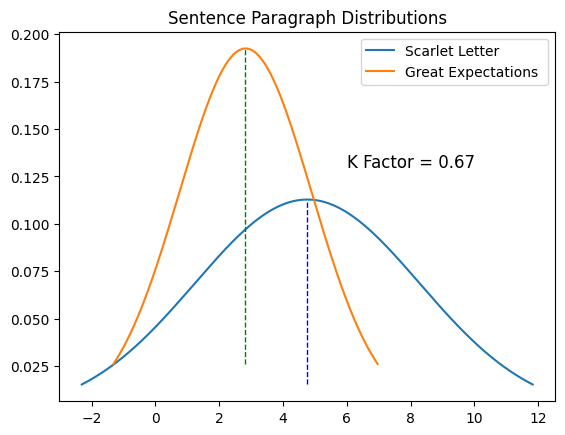

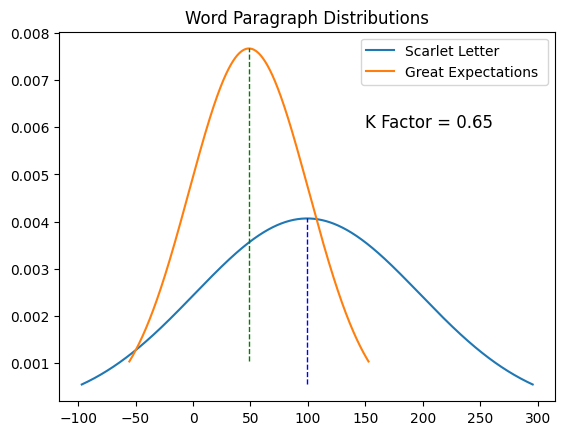

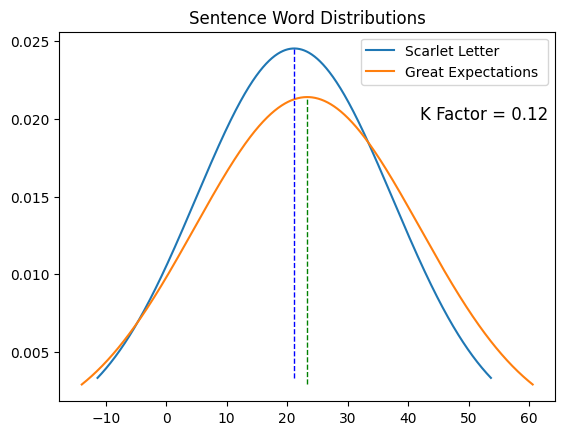

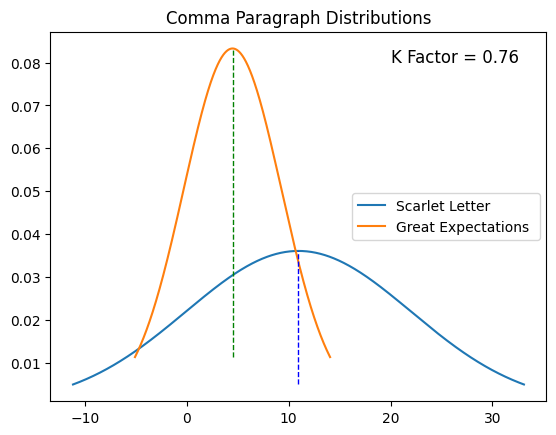

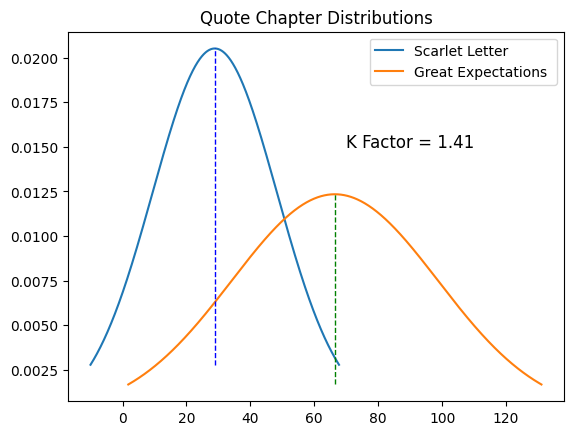

In [21]:
# PLOTS
# print(sl_senpar_mean)

# Sentences Paragraph
plt.title('Sentence Paragraph Distributions')

sl_senpar_range = np.linspace(sl_senpar_mean - 2 * sl_senpar_stdev, sl_senpar_mean + 2 * sl_senpar_stdev,  1000)
sl_gauss_senpar = []
for x in sl_senpar_range:
    sl_gauss_senpar.append(gauss(x, sl_senpar_mean, sl_senpar_stdev))
plt.plot(sl_senpar_range,sl_gauss_senpar, label = 'Scarlet Letter ')
ge_senpar_range = np.linspace(ge_senpar_mean - 2 * ge_senpar_stdev, ge_senpar_mean + 2 * ge_senpar_stdev,  1000)
ge_gauss_senpar = []
for x in ge_senpar_range:
    ge_gauss_senpar.append(gauss(x, ge_senpar_mean, ge_senpar_stdev))
plt.plot(ge_senpar_range,ge_gauss_senpar, label = 'Great Expectations ')
plt.vlines(sl_senpar_mean, ymin=min(sl_gauss_senpar), ymax=max(sl_gauss_senpar), color="blue", linestyle="--", linewidth=1)
plt.vlines(ge_senpar_mean, ymin=min(ge_gauss_senpar), ymax=max(ge_gauss_senpar), color="green", linestyle="--", linewidth=1)
plt.text(6, 0.13, f"K Factor = {k_senpar}", fontsize=12, color="black")
plt.legend()
plt.show()

# Words Paragraph
plt.title('Word Paragraph Distributions')

sl_wordpar_range = np.linspace(sl_wordpar_mean - 2 * sl_wordpar_stdev, sl_wordpar_mean + 2 * sl_wordpar_stdev,  1000)
sl_gauss_wordpar = []
for x in sl_wordpar_range:
    sl_gauss_wordpar.append(gauss(x, sl_wordpar_mean, sl_wordpar_stdev))
plt.plot(sl_wordpar_range,sl_gauss_wordpar, label = 'Scarlet Letter ')
ge_wordpar_range = np.linspace(ge_wordpar_mean - 2 * ge_wordpar_stdev, ge_wordpar_mean + 2 * ge_wordpar_stdev,  1000)
ge_gauss_wordpar = []
for x in ge_wordpar_range:
    ge_gauss_wordpar.append(gauss(x, ge_wordpar_mean, ge_wordpar_stdev))
plt.plot(ge_wordpar_range,ge_gauss_wordpar, label = 'Great Expectations ')
plt.vlines(sl_wordpar_mean, ymin=min(sl_gauss_wordpar), ymax=max(sl_gauss_wordpar), color="blue", linestyle="--", linewidth=1)
plt.vlines(ge_wordpar_mean, ymin=min(ge_gauss_wordpar), ymax=max(ge_gauss_wordpar), color="green", linestyle="--", linewidth=1)
plt.text(150, 0.006, f"K Factor = {k_wordpar}", fontsize=12, color="black")
plt.legend()
plt.show()


# Sentence Word
plt.title('Sentence Word Distributions')
sl_wordsen_range = np.linspace(sl_wordsen_mean - 2 * sl_wordsen_stdev, sl_wordsen_mean + 2 * sl_wordsen_stdev,  1000)
sl_gauss_wordsen = []
for x in sl_wordsen_range:
    sl_gauss_wordsen.append(gauss(x, sl_wordsen_mean, sl_wordsen_stdev))
plt.plot(sl_wordsen_range,sl_gauss_wordsen, label = 'Scarlet Letter ')
ge_wordsen_range = np.linspace(ge_wordsen_mean - 2 * ge_wordsen_stdev, ge_wordsen_mean + 2 * ge_wordsen_stdev,  1000)
ge_gauss_wordsen = []
for x in ge_wordsen_range:
    ge_gauss_wordsen.append(gauss(x, ge_wordsen_mean, ge_wordsen_stdev))
plt.plot(ge_wordsen_range,ge_gauss_wordsen, label = 'Great Expectations ')
plt.vlines(sl_wordsen_mean, ymin=min(sl_gauss_wordsen), ymax=max(sl_gauss_wordsen), color="blue", linestyle="--", linewidth=1)
plt.vlines(ge_wordsen_mean, ymin=min(ge_gauss_wordsen), ymax=max(ge_gauss_wordsen), color="green", linestyle="--", linewidth=1)
plt.text(42, 0.02, f"K Factor = {k_wordsen}", fontsize=12, color="black")
plt.legend()
plt.show()


# Comma Paragraph 
plt.title('Comma Paragraph Distributions')
sl_compar_range = np.linspace(sl_compar_mean - 2 * sl_compar_stdev, sl_compar_mean + 2 * sl_compar_stdev,  1000)
sl_gauss_compar = []
for x in sl_compar_range:
    sl_gauss_compar.append(gauss(x, sl_compar_mean, sl_compar_stdev))
plt.plot(sl_compar_range,sl_gauss_compar, label = 'Scarlet Letter ')
ge_compar_range = np.linspace(ge_compar_mean - 2 * ge_compar_stdev, ge_compar_mean + 2 * ge_compar_stdev,  1000)
ge_gauss_compar = []
for x in ge_compar_range:
    ge_gauss_compar.append(gauss(x, ge_compar_mean, ge_compar_stdev))
plt.plot(ge_compar_range,ge_gauss_compar, label = 'Great Expectations ')
plt.vlines(sl_compar_mean, ymin=min(sl_gauss_compar), ymax=max(sl_gauss_compar), color="blue", linestyle="--", linewidth=1)
plt.vlines(ge_compar_mean, ymin=min(ge_gauss_compar), ymax=max(ge_gauss_compar), color="green", linestyle="--", linewidth=1)
plt.text(20, 0.08, f"K Factor = {k_compar}", fontsize=12, color="black")
plt.legend()
plt.show()

# Quotes Chapter
plt.title('Quote Chapter Distributions')
sl_quotechap_range = np.linspace(sl_quotechap_mean - 2 * sl_quotechap_stdev, sl_quotechap_mean + 2 * sl_quotechap_stdev,  1000)
sl_gauss_quotechap = []
for x in sl_quotechap_range:
    sl_gauss_quotechap.append(gauss(x, sl_quotechap_mean, sl_quotechap_stdev))
plt.plot(sl_quotechap_range,sl_gauss_quotechap, label = 'Scarlet Letter ')
ge_quotechap_range = np.linspace(ge_quotechap_mean - 2 * ge_quotechap_stdev, ge_quotechap_mean + 2 * ge_quotechap_stdev,  1000)
ge_gauss_quotechap = []
for x in ge_quotechap_range:
    ge_gauss_quotechap.append(gauss(x, ge_quotechap_mean, ge_quotechap_stdev))
plt.plot(ge_quotechap_range,ge_gauss_quotechap, label = 'Great Expectations ')
plt.vlines(sl_quotechap_mean, ymin=min(sl_gauss_quotechap), ymax=max(sl_gauss_quotechap), color="blue", linestyle="--", linewidth=1)
plt.vlines(ge_quotechap_mean, ymin=min(ge_gauss_quotechap), ymax=max(ge_gauss_quotechap), color="green", linestyle="--", linewidth=1)
plt.text(70, 0.015, f"K Factor = {k_quotechap}", fontsize=12, color="black")
plt.legend()
plt.show()


In [ ]:
with open("authorship_scarlet_letter.txt") as s_l:
    sl = s_l.read()

novel = sl

exp = r'Chapter [IVXLD]+'
results = re.findall(exp, novel)
chap = re.findall(rf'{results[0]}.*?{results[1]}', sl, re.DOTALL)
parags = re.findall(r'\n\n[A-Z].*\n\n', chap[0], re.DOTALL)

parags

["\n\nA throng of bearded men, in sad-colored garments, and gray,\nsteeple-crowned hats, intermixed with women, some wearing hoods and\nothers bareheaded, was assembled in front of a wooden edifice, the\ndoor of which was heavily timbered with oak, and studded with iron\nspikes.\n\nThe founders of a new colony, whatever Utopia of human virtue and\nhappiness they might originally project, have invariably recognized it\namong their earliest practical necessities to allot a portion of the\nvirgin soil as a cemetery, and another portion as the site of a\nprison. In accordance with this rule, it may safely be assumed that\nthe forefathers of Boston had built the first prison-house somewhere\nin the vicinity of Cornhill, almost as seasonably as they marked out\nthe first burial-ground, on Isaac Johnson's lot, and round about his\ngrave, which subsequently became the nucleus of all the congregated\nsepulchres in the old churchyard of King's Chapel. Certain it is,\nthat, some fifteen or twenty